In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("data/house_price/data.csv")

In [3]:
data.shape

(4600, 18)

In [14]:
#data.head()

In [13]:
#data.describe()
#correlacion entre los datos para elegir que datos quiero tomar para hacer una regresion
#data.corr(numeric_only = True)

In [15]:
#me di cuenta que hay valores de 0 en la columna price lo cual hace que no pueda analizar correctamente los precios, asi que limpieza de datos

filtered_data = data[data["price"] != 0]
filtered_data.to_csv("data_filtrada.csv", index=False)
print("Archivo filtrado de datos iguales a 0 guardado exitosamente")

Archivo filtrado de datos iguales a 0 guardado exitosamente


In [16]:
data_filtrada = pd.read_csv("data/house_price/data_filtrada.csv")

In [17]:
data_filtrada.shape

(4551, 18)

In [18]:
data_filtrada.corr(numeric_only = True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281


In [41]:
areas_living = data_filtrada["sqft_living"]


# Calcular valores
valor_minimo = areas_living.min()
valor_maximo = areas_living.max()
valor_medio = areas_living.mean()

# Imprimir resultados
print(f"Valor mínimo: {valor_minimo}")
print(f"Valor máximo: {valor_maximo}")
print(f"Valor medio: {valor_medio}")

Valor mínimo: 370
Valor máximo: 13540
Valor medio: 2132.372225884421


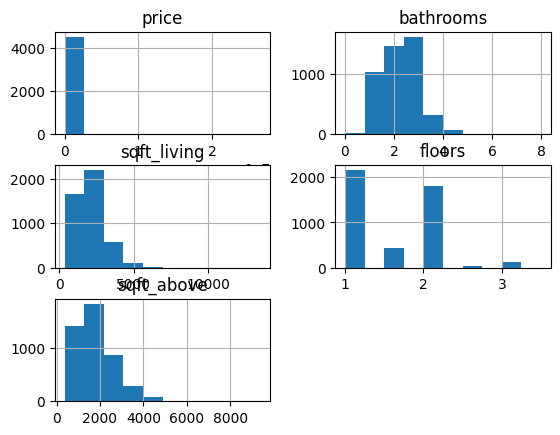

In [57]:
data_filtrada.drop(columns = ["bedrooms", "date", "statezip", "waterfront","sqft_lot", "view", "condition", "sqft_basement", "yr_built", "yr_renovated", "country"]).hist()
plt.show()

Relacion entre area de living y baños de una casa

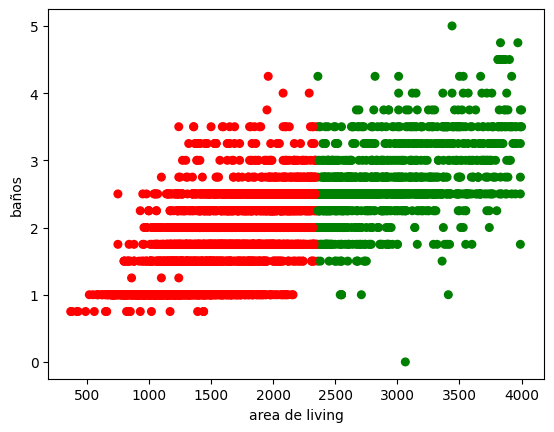

In [92]:
filtered_data = data[(data["sqft_living"] <= 4000) & (data["bathrooms"] <= 5)]
colors = ["green", "red"]
size = [30, 30]

f1 = filtered_data["sqft_living"].values
f2 = filtered_data["bathrooms"].values

assign = []
for index, row in filtered_data.iterrows():
    if(row["sqft_living"] > 2350):
        assign.append(colors[0])
    else:
        assign.append(colors[1])
plt.scatter(f1, f2, c=assign, s=size[0])
plt.xlabel("area de living")
plt.ylabel("baños")
plt.show()

In [93]:
dataX =  filtered_data[["sqft_living"]]
X_train = np.array(dataX)
y_train = filtered_data["bathrooms"].values

regre = linear_model.LinearRegression()
regre.fit(X_train, y_train)

y_pred = regre.predict(X_train)

#coeficiente
coeficiente = regre.coef_
Term_independent = regre.intercept_
mse = mean_squared_error(y_train, y_pred)
varianza = r2_score(y_train, y_pred)

print(f"Coefficients: {coeficiente}")
print(f"Independent term: {Term_independent}")
print("Mean Squared error: %.2f" % mse)
print("Variance score: %.2f" % varianza)


Coefficients: [0.00066744]
Independent term: 0.7451696253613398
Mean Squared error: 0.24
Variance score: 0.51


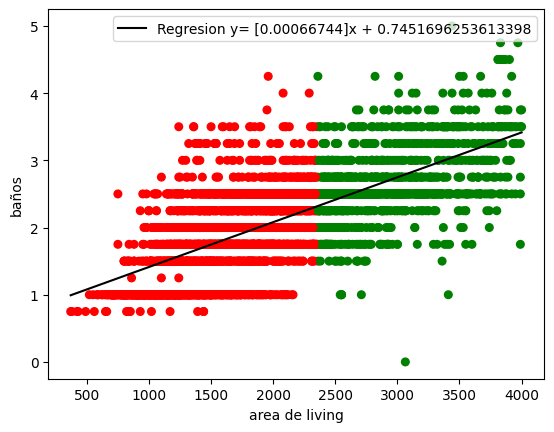

In [94]:
plt.scatter(f1, f2, c=assign, s=size[0])
plt.xlabel("area de living")
plt.ylabel("baños")

#puntos para la linea de regresion
x_line = np.array([min(f1), max(f1)])
y_line = coeficiente*x_line + Term_independent

plt.plot(x_line, y_line, color = "black", label=f"Regresion y= {coeficiente}x + {Term_independent}")
plt.legend()
plt.show()

Multiples Variables

In [95]:
areas_above = data_filtrada["sqft_above"]


# Calcular valores
valor_minimo = areas_above.min()
valor_maximo = areas_above.max()
valor_medio = areas_above.mean()

# Imprimir resultados
print(f"Valor mínimo: {valor_minimo}")
print(f"Valor máximo: {valor_maximo}")
print(f"Valor medio: {valor_medio}")

Valor mínimo: 370
Valor máximo: 9410
Valor medio: 1822.2217095143924


In [ ]:
suma = ( filtered_data["sqft_above"] )

dataX2 = pd.DataFrame()
dataX2["sqft_living"] = filtered_data["sqft_living"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data["bathrooms"].values

In [74]:
regre2 = linear_model.LinearRegression()
regre2.fit(XY_train, z_train)
z_pred = regre2.predict(XY_train)

print(f"Coefficients: {regre2.coef_}")
print("Mean Squared error: %.2f" % mean_squared_error(z_train, z_pred))
print("Variance score: %.2f" % r2_score(z_train, z_pred))

Coefficients: [5.95935310e-04 8.95359006e-05]
Mean Squared error: 0.24
Variance score: 0.51


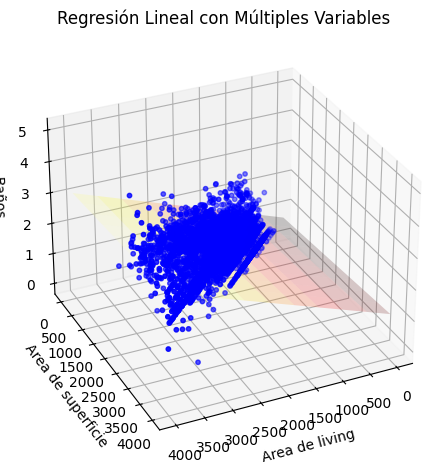

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

xx, yy = np.meshgrid(np.linspace(0, 4000, num = 10), np.linspace(0, 4000, num=10))

newX = (regre2.coef_[0] *xx)
newY = (regre2.coef_[1] * yy)

#valores para z
z = (newX + newY + regre2.intercept_)

ax.plot_surface(xx, yy, z, alpha=0.2, cmap="hot")

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c = "blue", s=10, label='Real')

#ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c = "green", s=20, label='Predicho')

ax.view_init(elev=30., azim=65)

ax.set_xlabel('Area de living')
ax.set_ylabel('Area de superficie')
ax.set_zlabel('Baños')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.tight_layout()  # Mejora el espaciado
plt.show() 

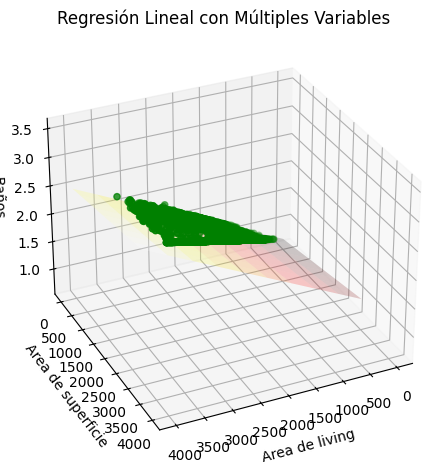

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

xx, yy = np.meshgrid(np.linspace(0, 4000, num = 10), np.linspace(0, 3000, num=10))

ax.plot_surface(xx, yy, z, alpha=0.2, cmap="hot")


ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c = "green", s=20, label='Predicho')

ax.view_init(elev=30., azim=65)

ax.set_xlabel('Area de living')
ax.set_ylabel('Area de superficie')
ax.set_zlabel('Baños')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.tight_layout()  # Mejora el espaciado
plt.show() 